Preprocessing data:

In [1]:
record1 = "databases/record1.csv"
record2 = "databases/record2.csv"

**DIRECTORY OF DICTIONARY**

*After the following code, list_directory (which gives the directory of what each index in the list in the values of the dictionary) contains:*
['ID NUMBER', 'OFFENSE ARREST DESC', 'OFFENSE ATTEMPT DESC', 'COUNTY COMMITTED', 'DATE OF BIRTH', 'RACE DESC', 'GENDER', 'FACILITY', 'CURRENT SENTENCE PARDONED OR COMMUTED DATE', 'SENTENCE BEGIN DATE', 'MIN TERM/YEAR', 'MIN MONTH', 'MIN DAY', 'MAX TERM/YEAR', 'MAX MONTH', 'MAX DAY', 'PAROLE ELIGIBILITY DATE', 'EARLIEST POSSIBLE RELEASE DATE', 'INST RELEASE DATE', 'INST RELEASE TYPE', 'PAROLE BOARD NEXT REVIEW DATE(MONTH&YEAR)', 'PAROLE BOARD FINAL HEARING DATE(MONTH&YEAR)', 'PAROLE BOARD STATUS', 'PAROLE DATE', 'PAROLE DISCHARGE DESC', 'SENTENCE LENGTH']

*Removed from record 2:*
OFFENSE MINIMUM YEAR OR TERM;
MINIMUM MONTH;
MINIMUM DAY;
OFFENSE MAXIMUM YEAR OR TERM;
MAXIMUM MONTH;
MAXIMUM DAY;
FELONY MSDMNR CODE;
OFFENSE TYPE CODE;
HABITUAL CRIME;
OFFENSE RUN CODE;

*Removed from record 1:*
COMMITTED LAST NAME;
FIRST NAME;
MIDDLE NAME;
NAME EXTENSION;
LEGAL LAST NAME;
FIRST NAME;
MIDDLE NAME;
NAME EXTENSION;
GUN CLAUSE;
GOOD TIME LAW;

**INDEX**

*From record 2*

'ID NUMBER' = 0

'OFFENSE ARREST DESC' = 1

'OFFENSE ATTEMPT DESC' = 2

'COUNTY COMMITTED' = 3


*From record 1*

'DATE OF BIRTH' = 4 **changed to year**

'RACE DESC' = 5

'GENDER' = 6

'FACILITY' = 7

'CURRENT SENTENCE PARDONED OR COMMUTED DATE' = 8 **changed to year**

'SENTENCE BEGIN DATE' = 9 **changed to year**

'MIN TERM/YEAR' = 10

'MIN MONTH' = 11

'MIN DAY' = 12

'MAX TERM/YEAR' = 13

'MAX MONTH' = 14

'MAX DAY' = 15

'PAROLE ELIGIBILITY DATE' = 16 **changed to year**

'EARLIEST POSSIBLE RELEASE DATE' = 17 **changed to year**

'INST RELEASE DATE' = 18 **changed to year**

'INST RELEASE TYPE' = 19

'PAROLE BOARD NEXT REVIEW DATE(MONTH&YEAR)' = 20

'PAROLE BOARD FINAL HEARING DATE(MONTH&YEAR)' = 21

'PAROLE BOARD STATUS' = 22

'PAROLE DATE' = 23 **changed to year**

'PAROLE DISCHARGE DESC' = 24

*Our additions:*

'SENTENCE LENGTH' = 25

*sentence length dictionary*: key is crime string, value is 2 lists: list 0 is white, list 1 is non-white


**Record 2:**

In [2]:
master_dict = {}
list_directory = []
file_record2 = open(record2, "r")
counter = 0
for line in file_record2:
    # split by comma
    line = line.split(",")
    if len(line) == 14:
        if counter == 0:
            # strip \ufeff and \n
            line[0] = line[0][1:]
            line[-1] = line[-1][0:-1]
            # removes indexes we don't need
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(2)
            line.pop(2)
            line.pop(3)
            line.pop(3)
            list_directory = line
        else:
            line[-1] = line[-1][0:-1]
            # removes indexes we don't need
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(2)
            line.pop(2)
            line.pop(3)
            line.pop(3)
            # strips leading and ending whitespace:
            for item in range(len(line)):
                line[item] = line[item].strip()
            # add to master dict if not in already
            if line[0] not in master_dict:
                master_dict[line[0]] = line
            # if it is in already, remove the id from dict as it is a multiple offender or duplicate
            else:
                del master_dict[line[0]]
    counter += 1

In [3]:
# how many left over after removing of duplicated
print(len(master_dict.keys()))

48223


**Record 1:**

In [4]:
file_record1 = open(record1, "r")
counter = 0
for line in file_record1:
    line = line.split(",")
    if len(line) == 32:
        if counter == 0:
            # remove all unneeded, then remove \n
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(5)
            line.pop(14)
            line[-1] = line[-1][0:-1]
            list_directory = list_directory + line
            list_directory.append("SENTENCE LENGTH")
        else:
            #print(counter)
            line[-1] = line[-1][0:-1]

            for item in range(len(line)):
                line[item] = line[item].strip()

            # we only want the ones in the dictionary (first offenders)
            if line[0] in master_dict:
                # remove unneeded indexes, save id
                id_ = line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(5)
                line.pop(14)

                # see if person has earliest possible release date (13) and sentence begin date (5)
                if line[13] == '' or line[5] == '' or line[13] == ' ' or line[5] == ' ':
                    # remove from dictionary if they don't
                    del master_dict[id_]

                else:
                    # change DOB to year
                    if line[0] != '':
                        line[0] = line[0][-4:]
                    # change sentence pardoned to year
                    if line[4] != '':
                        line[4] = line[4][-4:]
                    # change sentence begin date to year
                    if line[5] != '':
                        line[5] = line[5][-4:]
                    # change parol eligibility date to year
                    if line[12] != '':
                        line[12] = line[12][-4:]
                    # change earliest possible release date to year
                    if line[13] != '':
                        line[13] = line[13][-4:]
                        #print(line[13])
                    # change inst release date to year
                    if line[14] != '':
                        line[14] = line[14][-4:]
                    # changed parole date to year
                    if line[19] != '' and line[19][0:7] != "PAROLED":
                        line[19] = line[19][-4:]

                    # add sentence length
                    if line[13] == 'LFE' or line[13] == 'DTH':
                        line.append(line[13])
                    elif line[5] == 'EARM':
                        line.append(line[5])
                    else:
                        sent_length = int(line[13]) - int(line[5])
                        line.append(str(sent_length))

                    master_dict[id_] = master_dict[id_] + line
                    print(master_dict[id_][-1])

    else:
        if line[0] in master_dict:
            print("worked")
            del master_dict[line[0]]         
    counter += 1

LFE
LFE
41
49
118
103
114
117
23
101
116
101
23
115
21
113
LFE
37
29
22
LFE
LFE
111
112
111
33
111
112
101
35
33
LFE
111
LFE
36
15
15
LFE
LFE
LFE
109
38
34
29
44
35
LFE
109
110
16
LFE
103
LFE
LFE
LFE
LFE
102
12
LFE
LFE
LFE
LFE
21
11
106
9
19
8
13
8
14
10
9
105
13
9
9
8
9
8
106
8
23
26
39
8
LFE
18
10
5
15
7
22
18
106
6
8
23
25
12
13
15
24
LFE
6
LFE
LFE
LFE
14
9
15
2
30
13
22
LFE
LFE
30
10
6
8
12
7
11
7
4
15
9
14
3
3
5
13
5
4
15
6
3
5
6
20
6
5
6
6
16
7
9
9
21
6
11
13
7
16
18
17
8
19
8
10
19
15
12
15
23
7
17
7
8
15
11
11
11
15
33
103
9
4
6
5
15
worked
12
33
9
26
9
5
7
6
5
9
7
6
5
worked
18
LFE
6
6
9
9
9
4
6
3
5
5
6
5
12
6
6
6
5
8
8
8
14
3
5
6
23
5
LFE
5
4
101
7
6
14
4
9
5
13
14
15
8
33
6
15
4
13
51
9
9
10
4
4
18
8
7
5
4
6
5
6
9
16
7
8
3
20
20
102
9
5
15
3
15
6
20
4
5
3
5
5
5
8
5
7
LFE
5
3
17
LFE
9
4
23
4
4
5
4
5
3
5
9
6
6
6
LFE
10
3
3
3
3
8
14
5
5
4
2
5
3
5
6
5
4
19
3
4
6
5
6
6
4
3
5
9
22
7
10
3
3
4
4
4
4
4
2
29
4
18
38
3
6
3
6
7
8
3
4
6
25
3
4
5
6
6
6
3
34
LFE
4
5
5
6
7
3
6
5
3
5
3
3
4
1

1
2
4
3
2
5
6
3
2
3
2
4
1
4
2
2
0
2
2
0
2
0
10
2
0
2
2
2
5
1
0
0
3
2
3
2
3
1
0
1
7
7
5
2
2
2
15
1
1
2
2
0
3
2
10
3
2
4
3
1
1
1
1
3
9
5
3
25
1
3
0
1
1
3
1
4
3
3
2
5
2
2
0
0
5
6
5
1
3
5
5
1
1
3
1
2
1
2
1
2
1
6
2
2
1
1
3
3
4
0
1
3
3
1
2
2
2
1
2
3
1
5
1
1
3
3
3
2
3
5
5
1
3
1
0
1
1
2
1
11
2
3
2
1
3
6
1
1
3
5
3
1
2
2
3
2
1
2
0
1
1
5
3
1
3
1
1
5
2
1
3
1
4
1
4
1
2
4
worked
1
1
1
1
3
6
2
3
1
3
7
17
1
1
2
1
2
1
1
1
3
2
3
1
5
2
5
5
3
1
1
2
4
1
1
0
2
3
2
1
2
1
3
2
1
3
2
2
1
8
1
2
1
1
2
8
11
3
1
1
6
5
2
3
2
3
5
5
6
3
3
7
10
1
2
1
7
6
1
2
6
2
2
2
2
2
5
4
2
2
2
6
6
3
2
1
2
1
6
2
2
2
1
2
2
2
4
1
1
1
1
4
1
1
2
5
2
4
2
3
1
1
1
9
5
1
5
1
3
1
2
6
1
3
6
2
1
1
4
3
1
2
2
3
2
1
1
5
1
1
1
3
2
8
3
1
2
1
2
2
1
2
3
3
3
1
5
4
3
7
1
1
2
1
1
23
1
3
2
7
2
worked
1
1
4
1
1
2
3
worked
3
3
4
0
1
1
3
0
15
0
2
0
3
3
3
1
5
5
2
0
0
1
2
0
0
1
1
0
2
2
1
1
2
3
2
1
1
1
2
3
1
1
1
3
19
6
0
3
0
1
0
3
0
0
1
0
2
5
0
1
2
0
2
3
2
6
4
0
3
2
5
2
7
2
5
1
1
5
1
0
0
2
1
1
0
38
1
7
0
3
2
3
3
2
8
2
2
2
6
3
2
4
3
2
1
1
1
1
1
1
1
3
1
3
0
1
1
0

2
1
1
2
0
1
1
0
1
5
3
1
2
18
1
2
worked
2
1
4
3
3
3
1
1
worked
0
3
1
1
9
5
3
3
2
1
2
2
4
0
3
1
3
1
2
1
3
worked
3
3
3
2
2
3
3
1
1
2
5
2
10
7
1
2
2
1
3
1
1
3
1
1
0
3
3
1
8
2
1
1
1
1
1
5
1
4
2
worked
0
1
1
6
8
3
3
3
3
4
1
2
3
2
3
11
1
1
2
7
4
3
2
4
3
2
2
2
3
2
4
2
1
worked
2
1
2
worked
2
1
3
4
worked
1
1
1
1
3
2
4
3
1
1
2
3
2
2
2
1
1
3
1
2
3
1
2
11
3
3
3
2
2
1
1
1
3
1
3
2
2
worked
1
1
1
1
12
10
5
2
1
1
3
1
1
2
3
1
1
1
1
3
3
1
3
1
2
4
1
2
2
2
3
8
1
2
2
11
1
3
1
1
1
2
3
2
1
1
3
3
worked
3
1
5
3
1
2
6
3
2
4
2
2
2
2
3
2
4
1
1
3
1
4
4
2
1
3
5
1
2
2
2
4
2
3
1
1
1
1
worked
1
1
5
8
2
3
1
3
1
3
3
2
3
11
2
2
3
1
3
1
2
2
4
2
1
1
1
4
2
3
5
5
3
2
2
1
3
2
2
1
worked
worked
7
worked
worked
worked
worked
2
3
4
1
worked
1
1
1
4
4
1
2
1
worked
worked
worked
worked
worked
1
2
1
worked
1
1
2
worked
2
2
1
worked
2
1
3
1
2
1
7
1
10
0
1
5
0
2
5
2
2
1
5
10
15
1
worked
worked
2
1
0
0
0
1
1
0
17
5
0
2
0
3
0
worked
2
0
1
1
2
0
0
4
1
2
1
0
2
1
1
0
10
5
0
1
worked
0
6
0
0
2
2
4
5
0
4
0
0
1
2
2
2
0
0
0
2
0
1
3
worked

2
worked
2
9
4
2
2
worked
32
1
2
3
2
1
1
3
3
1
1
2
2
1
1
4
1
1
1
1
3
1
6
10
1
6
12
3
1
3
2
worked
3
6
2
1
1
10
1
2
3
11
3
2
3
3
3
3
1
3
3
3
3
1
4
6
worked
1
2
21
1
2
worked
2
2
0
2
2
2
2
0
worked
0
2
1
2
1
2
1
3
0
1
1
1
1
2
3
2
0
0
2
0
0
0
2
2
1
0
0
0
0
1
0
0
2
1
1
1
1
worked
2
1
1
2
13
1
2
2
0
3
2
0
0
2
0
6
8
2
0
1
3
2
0
1
5
3
0
0
1
3
3
2
0
1
3
2
0
1
1
1
1
1
2
1
0
1
0
2
2
1
1
2
9
3
0
0
4
5
9
2
1
worked
1
1
2
worked
1
0
4
3
3
0
2
0
worked
0
2
2
1
1
0
0
2
2
0
0
1
0
0
4
0
4
0
2
2
8
3
2
0
2
1
2
1
1
1
2
2
1
0
2
1
4
1
12
9
0
1
1
4
2
0
5
1
0
3
1
1
0
1
1
-3
5
2
2
1
0
0
1
1
1
worked
1
2
5
2
4
1
1
1
1
2
1
1
1
1
0
7
worked
0
14
2
1
1
2
0
1
2
2
21
0
2
1
1
2
1
1
1
3
1
0
0
1
worked
worked
0
0
1
1
2
3
1
2
1
0
8
2
6
0
worked
1
0
0
0
2
2
2
2
3
2
2
4
4
2
2
2
3
2
5
1
1
1
5
1
1
1
0
2
5
6
1
4
2
2
2
1
2
2
worked
2
worked
2
4
7
1
0
4
1
2
1
worked
7
1
5
3
1
1
0
2
1
0
0
1
1
0
2
4
2
1
1
20
0
1
6
1
3
1
1
4
3
1
2
0
0
4
5
2
2
1
2
2
1
1
worked
1
4
2
7
0
2
1
1
2
1
2
1
6
2
14
2
6
9
14
12
3
1
2
0
1
1
1
2
2
5
2
1
1
0


3
15
2
2
7
2
2
3
4
3
1
4
1
1
1
4
11
3
3
6
2
0
2
3
4
2
2
2
3
1
1
2
2
1
2
3
3
1
2
3
3
2
worked
0
5
3
1
2
2
2
3
1
1
3
1
1
worked
1
2
2
1
4
1
2
1
6
4
2
3
15
1
2
worked
worked
3
1
1
1
3
2
1
1
2
1
1
1
5
2
3
2
2
2
1
1
1
4
3
2
1
11
5
1
2
2
2
1
3
1
1
worked
2
2
3
2
1
1
3
1
3
1
7
1
7
5
2
3
3
1
2
1
0
0
1
2
2
2
8
3
2
1
1
0
1
3
0
1
1
0
3
5
1
worked
0
0
0
2
1
1
0
worked
1
2
1
1
2
1
1
2
worked
2
3
1
3
2
-1
2
1
3
worked
1
1
2
0
5
worked
worked
2
3
1
1
2
1
2
0
0
11
0
2
5
1
7
0
2
6
1
6
1
0
2
2
6
3
0
3
4
1
2
worked
2
3
1
1
1
3
4
0
0
0
2
0
5
5
0
2
0
1
2
2
4
3
worked
7
4
1
0
1
0
4
worked
0
0
2
2
30
4
1
2
3
7
1
0
1
8
0
1
3
5
4
8
2
2
worked
3
54
2
1
1
1
3
1
5
0
10
0
0
0
2
9
worked
3
6
0
1
2
0
1
1
0
3
8
3
2
1
1
1
1
3
1
2
-1
13
0
1
2
1
3
1
3
4
worked
0
1
3
worked
8
49
2
2
2
2
5
2
0
worked
0
10
10
0
5
3
2
1
3
1
0
1
2
3
0
3
2
2
2
0
0
3
0
0
3
22
3
4
4
0
3
2
6
2
worked
2
2
1
2
4
3
3
1
2
2
2
2
2
1
2
2
6
1
1
3
2
2
1
1
2
2
worked
7
1
1
worked
1
3
2
1
worked
1
8
0
0
29
2
2
2
2
1
12
worked
1
0
4
2
1
0
4
4
3
12
4
10
0
1

7
3
1
0
1
1
1
2
2
1
0
4
0
3
2
1
1
1
1
2
2
1
0
3
1
3
1
0
4
1
1
1
3
2
3
3
1
2
1
6
1
3
3
3
2
1
2
3
3
0
7
0
2
1
2
1
2
2
3
1
12
3
3
1
2
1
3
1
1
4
1
0
2
1
1
2
1
2
1
8
1
3
1
2
27
3
1
0
3
2
2
2
3
1
2
2
4
1
1
0
1
1
1
1
3
3
1
3
2
3
1
2
1
1
1
2
0
1
2
2
0
1
4
1
2
1
2
1
4
0
1
1
1
1
2
2
1
2
3
0
1
1
1
19
3
2
1
1
1
1
2
1
2
1
2
3
0
2
2
4
1
0
1
1
3
2
4
6
5
2
3
14
2
2
1
1
10
1
1
1
1
1
2
4
5
1
2
3
2
2
2
3
3
0
8
1
1
1
2
3
3
6
0
1
4
1
0
3
1
1
2
0
10
1
8
2
7
3
1
3
1
1
1
3
1
1
1
2
3
1
1
2
3
1
2
2
1
3
0
2
2
1
3
0
2
2
18
16
3
3
1
1
2
1
1
1
9
2
1
3
1
1
2
2
2
2
1
7
1
1
3
2
8
1
1
1
1
1
1
2
6
3
1
10
1
3
1
2
9
3
1
3
3
1
2
2
1
2
1
1
1
10
5
3
5
3
5
3
3
2
1
2
1
1
5
3
3
2
1
3
0
1
2
1
1
2
5
2
1
1
3
1
1
3
3
10
3
2
1
6
7
2
2
1
0
2
2
2
0
2
2
1
3
3
3
3
15
0
3
6
1
2
2
2
2
2
2
2
2
1
1
1
1
5
20
1
1
2
2
2
1
1
1
3
1
2
2
1
2
2
1
1
3
1
1
3
3
3
2
2
2
2
3
2
8
1
2
2
3
1
3
2
2
2
1
1
1
3
1
4
1
1
1
2
3
1
3
1
1
1
2
2
2
1
1
1
4
1
5
1
2
6
3
1
1
1
1
2
1
1
1
3
2
1
1
3
1
2
16
1
1
13
3
10
0
1
1
8
2
1
2
2
3
4
1
1
2
5
2
2
1
1
7
1
1
2
2
2
3
1
1
4


2
1
1
0
2
0
0
1
1
11
1
2
1
8
1
1
1
2
2
1
3
1
0
10
1
0
2
2
0
0
2
2
1
0
1
2
0
0
7
0
2
34
2
5
0
1
2
16
0
0
2
1
1
1
0
2
1
1
1
1
1
1
4
3
1
0
2
1
1
2
2
1
1
2
2
2
1
1
2
1
12
1
1
0
2
1
0
2
4
11
1
3
2
7
0
0
1
2
95
1
0
1
1
1
3
1
2
2
0
2
1
2
1
2
2
3
1
1
2
0
1
1
1
0
1
2
1
0
3
2
0
6
1
1
0
0
1
1
1
3
0
1
1
0
2
4
0
0
1
1
1
1
1
1
3
2
3
1
1
1
1
1
2
2
2
1
1
2
1
0
1
2
4
0
1
1
1
1
4
8
0
2
2
1
1
0
66
2
0
5
2
1
2
2
2
2
2
2
2
1
0
0
1
13
1
2
0
0
0
0
1
1
1
1
2
2
1
5
3
5
1
22
1
1
2
1
0
5
1
0
1
1
1
1
3
1
0
0
1
0
1
1
0
2
1
0
3
1
4
1
2
1
0
3
4
2
0
2
4
2
1
0
1
9
3
1
1
2
0
2
1
1
0
2
3
1
0
1
3
1
1
1
1
1
3
1
1
9
1
1
4
3
0
2
0
0
2
1
2
2
0
0
3
1
0
1
2
3
2
1
3
1
1
1
0
1
1
2
54
2
1
1
1
4
5
2
3
1
5
2
1
1
1
1
3
4
1
1
5
1
1
2
1
3
1
0
1
2
1
2
3
1
2
0
0
2
0
3
2
1
1
1
1
2
1
1
3
1
30
2
2
4
2
1
2
3
2
1
7
12
1
2
3
1
5
1
0
1
2
1
1
2
2
2
1
0
1
1
9
1
1
1
3
3
51
1
3
1
1
3
5
1
0
2
0
0
1
1
2
9
3
0
0
3
1
0
5
5
1
4
1
3
1
2
2
4
1
2
2
2
4
0
1
6
1
2
0
1
1
0
1
1
2
5
5
3
1
1
1
1
3
1
2
5
1
1
2
0
0
1
1
2
0
8
2
2
1
1
1
2
3
1
3
1
2
5
2
2
2
1
2
1
1


5
0
3
9
1
2
0
1
1
3
2
0
1
0
1
2
1
0
2
2
1
0
4
1
1
1
2
0
3
2
1
2
1
2
2
1
9
4
2
1
2
1
1
1
4
1
2
0
2
3
1
1
1
10
2
1
1
1
3
1
3
1
2
1
1
0
3
1
0
0
2
2
1
17
2
0
3
14
2
4
1
1
3
2
0
2
1
3
1
0
3
3
1
1
9
1
1
1
8
2
0
3
2
6
9
2
1
1
5
1
3
1
3
2
2
1
1
3
1
9
1
1
1
2
1
0
2
1
2
2
1
3
1
1
4
2
3
15
1
4
4
3
2
3
1
1
1
2
0
2
3
1
1
2
1
1
0
0
1
1
0
1
1
2
3
1
1
1
1
1
1
2
2
1
3
0
1
2
3
1
2
0
1
3
2
2
1
3
1
2
1
7
20
2
1
4
1
4
1
0
1
2
2
1
1
2
1
2
8
1
2
1
2
1
3
2
2
1
1
1
1
1
2
1
1
1
3
1
1
1
33
2
2
1
0
6
3
1
1
2
1
2
1
1
2
1
2
4
1
0
0
2
3
3
2
4
1
1
2
2
2
1
2
0
1
1
0
2
5
15
1
2
3
3
3
5
3
4
3
1
9
2
1
1
7
3
3
10
1
1
1
1
6
3
1
1
1
7
2
1
1
2
1
1
0
1
2
0
1
1
3
8
2
3
6
4
2
6
1
1
1
1
1
3
4
2
3
2
1
2
2
1
1
1
2
2
5
5
1
2
4
1
5
1
1
1
2
1
2
2
1
2
2
3
0
1
1
2
1
3
2
2
1
1
1
1
2
3
3
1
3
20
1
2
2
5
1
1
1
2
2
1
1
1
1
1
1
0
1
2
1
2
1
1
1
2
1
4
12
1
1
3
2
1
1
5
0
1
1
2
4
1
0
1
1
1
3
3
9
2
1
2
1
0
1
5
1
2
2
1
1
11
1
1
3
4
2
1
12
6
1
6
2
3
1
0
1
1
2
2
9
1
1
1
3
1
3
1
1
10
3
0
0
5
1
2
20
2
4
1
0
1
0
1
2
2
2
3
1
2
1
2
1
1
3
2
2
1
2
1
1
2
1


0
1
0
1
0
0
0
0
0
0
0
2
0
2
1
1
0
0
1
1
7
8
1
10
1
2
1
2
0
2
14
1
3
0
1
6
1
8
29
1
1
6
5
5
1
2
2
1
9
1
1
0
1
0
1
0
2
1
9
2
2
0
4
1
1
0
2
0
2
1
0
38
1
2
0
1
2
3
1
0
2
3
2
0
2
1
3
1
1
2
63
1
1
2
0
0
2
2
0
1
0
0
3
1
0
1
1
0
1
1
0
1
7
1
3
2
2
1
0
1
1
0
0
0
2
2
2
2
0
2
6
2
5
1
1
0
2
6
6
2
1
3
1
1
0
1
2
4
2
1
1
2
1
2
4
4
4
0
2
1
24
12
2
2
2
0
0
0
2
1
1
2
0
2
2
3
2
6
19
42
1
2
3
1
0
1
0
3
1
1
0
2
0
0
44
2
1
2
1
1
0
2
9
1
1
0
0
9
0
3
8
5
2
56
2
2
0
2
0
0
2
1
1
1
1
0
0
2
1
14
1
9
0
0
2
3
0
0
1
4
7
0
2
2
2
3
1
0
0
2
4
16
2
2
1
2
2
14
2
2
0
2
0
0
1
0
0
1
2
1
9
3
2
1
3
4
0
2
5
1
1
0
0
6
5
4
0
1
2
1
4
4
0
0
1
2
2
2
3
15
1
1
0
0
2
3
5
1
2
15
1
12
2
4
1
1
0
4
1
5
0
1
2
1
3
7
2
1
1
0
1
0
2
1
1
0
0
1
0
worked
2
1
2
2
2
1
7
2
0
16
0
1
2
1
2
2
2
4
5
0
0
2
5
3
1
3
2
2
1
1
9
5
3
0
1
2
2
0
1
2
0
1
1
2
0
1
18
4
0
1
1
4
0
2
0
2
3
2
2
1
1
2
2
0
0
2
17
2
1
1
14
7
0
1
0
0
1
0
22
1
0
15
2
3
1
2
0
0
2
7
2
2
0
1
2
0
0
1
0
5
1
3
5
12
3
1
2
3
1
4
0
1
2
1
1
2
0
2
12
1
0
1
2
3
0
1
1
2
2
1
2
1
1
1
1
0
1
1
4
1
2
1
5
4
2


2
1
1
0
2
2
1
2
3
3
1
1
4
3
2
2
1
0
1
1
2
1
1
1
1
2
2
0
6
1
5
2
3
0
1
1
2
1
1
0
10
1
6
1
3
1
1
3
1
1
1
1
1
3
2
2
18
0
0
11
0
1
1
1
2
1
1
3
11
6
1
5
2
41
1
0
2
1
1
3
4
1
1
2
2
1
1
2
0
2
2
1
0
2
1
4
2
2
0
1
11
6
8
1
2
0
0
3
1
1
1
3
1
1
1
3
5
1
0
0
2
0
5
2
14
1
15
0
1
1
5
1
1
1
2
1
1
3
10
13
4
13
0
1
1
0
2
3
2
1
5
2
10
3
2
6
2
1
2
1
1
34
7
2
2
3
2
4
0
3
1
1
12
1
1
1
1
1
1
1
3
3
4
0
0
1
1
1
2
11
1
2
1
1
1
2
1
3
2
1
1
1
10
4
1
1
4
1
2
1
2
1
0
1
3
1
8
2
0
2
9
1
3
1
1
5
1
2
5
10
2
2
2
4
4
4
5
2
0
0
2
2
2
1
2
1
2
1
11
2
4
1
3
1
1
1
1
8
1
6
2
1
0
2
1
0
1
3
2
8
1
2
1
2
1
0
2
0
0
2
1
2
1
1
0
1
3
2
1
3
3
3
1
2
1
1
3
1
1
1
1
2
1
0
0
2
2
4
1
1
1
2
1
2
1
0
3
20
2
2
1
4
11
2
1
5
2
1
4
3
1
1
1
0
2
1
2
1
1
2
0
1
1
1
10
1
3
5
2
2
12
1
1
3
2
2
0
2
14
2
0
9
1
1
1
2
1
1
3
2
6
1
3
1
0
2
1
3
4
13
1
2
2
2
2
2
1
1
1
1
0
2
32
1
4
3
1
3
4
3
2
9
0
1
0
6
1
2
0
1
2
1
1
3
0
2
9
2
6
1
1
1
1
3
2
6
1
4
1
3
2
2
1
2
5
0
1
1
2
2
1
29
1
1
1
6
1
7
1
3
1
1
12
2
1
10
2
1
2
3
0
4
3
0
3
1
2
3
17
2
2
6
2
1
0
1
1
7
2
2
1
10
3
1
1


2
3
1
1
24
11
0
0
3
2
1
0
2
1
5
0
21
0
3
3
1
1
0
0
8
1
4
4
1
2
1
1
0
0
4
1
1
1
1
14
1
0
2
2
0
0
14
1
5
2
4
1
0
4
19
2
1
0
0
2
0
5
4
0
0
3
0
3
6
0
2
1
0
20
1
0
0
0
1
1
0
4
2
2
1
11
1
0
17
0
0
1
0
4
3
1
6
2
1
4
2
1
2
0
1
0
0
1
0
1
1
1
1
0
1
2
2
0
0
3
3
2
1
3
1
5
0
0
2
2
17
1
3
1
2
0
3
2
1
0
0
9
7
8
32
0
1
2
2
0
6
1
4
0
0
14
26
0
1
2
0
0
1
1
0
4
3
0
2
1
0
1
1
1
2
2
1
1
2
2
0
2
2
1
1
0
1
0
1
0
2
0
1
0
4
3
0
2
2
0
4
1
0
2
0
24
1
1
1
9
3
14
0
1
1
3
2
3
2
2
2
3
0
1
1
3
1
1
1
0
1
1
23
2
8
2
1
0
2
1
4
1
3
7
0
0
0
1
1
1
1
0
2
1
9
1
7
0
3
4
2
25
14
2
5
2
5
0
2
1
1
0
2
6
2
3
1
3
0
1
9
5
1
0
6
1
0
18
3
2
2
4
2
2
2
1
3
4
2
1
1
1
1
0
2
5
6
4
1
1
1
0
12
0
5
1
1
2
6
1
0
2
20
1
2
1
5
1
0
29
0
0
3
0
12
1
1
1
5
1
1
1
16
0
2
0
1
1
10
0
0
3
5
2
4
1
0
0
0
1
2
2
1
1
2
2
0
3
2
1
1
2
0
4
1
0
14
0
1
8
2
1
6
0
1
6
1
6
0
13
1
7
5
10
2
3
0
1
2
1
2
8
32
0
1
0
4
1
0
2
0
1
0
2
2
0
2
4
1
1
0
1
2
1
12
11
2
1
2
0
8
0
1
6
7
5
5
2
1
2
1
1
1
0
2
2
2
1
15
1
2
3
3
3
1
5
1
2
14
1
0
1
1
0
1
0
0
4
19
3
1
LFE
3
5
3
4
1
12
1
0
0
1

In [5]:
print(list_directory)

['ID NUMBER', 'OFFENSE ARREST DESC', 'OFFENSE ATTEMPT DESC', 'COUNTY COMMITTED', 'DATE OF BIRTH', 'RACE DESC', 'GENDER', 'FACILITY', 'CURRENT SENTENCE PARDONED OR COMMUTED DATE', 'SENTENCE BEGIN DATE', 'MIN TERM/YEAR', 'MIN MONTH', 'MIN DAY', 'MAX TERM/YEAR', 'MAX MONTH', 'MAX DAY', 'PAROLE ELIGIBILITY DATE', 'EARLIEST POSSIBLE RELEASE DATE', 'INST RELEASE DATE', 'INST RELEASE TYPE', 'PAROLE BOARD NEXT REVIEW DATE(MONTH&YEAR)', 'PAROLE BOARD FINAL HEARING DATE(MONTH&YEAR)', 'PAROLE BOARD STATUS', 'PAROLE DATE', 'PAROLE DISCHARGE DESC', 'SENTENCE LENGTH']


In [6]:
print(len(list_directory))

26


In [7]:
print(len(master_dict.keys()))

46303


In [8]:
for key in master_dict.keys():
    if master_dict[key][1] == "CLASS 2AF (ASSAULT 2ND DEG)":
        print(master_dict[key][5])

BLACK


In [9]:
print(master_dict["18189"])

['18189', 'MURDER 1ST DEGREE', '', 'CHEYENNE', '1912', 'WHITE', 'MALE', '', '1988', '1952', '54', '0', '0', '80', '0', '0', '1989', '1993', '1993', 'MANDATORY DISCHARGE', '10/1993', '', 'MANDATORY DISCHARGE', '', '', '41']


In [10]:
#original
sentence_dict = {}
for key in master_dict.keys():
    # where we put sentence length into correct dictionaries
    new_key = ""
    crime = master_dict[key][1]
    race = master_dict[key][5]
    sentence = master_dict[key][-1]
    new_key = crime + " - " + race
    
    if new_key not in sentence_dict:
        sentence_dict[new_key] = []
        sentence_dict[new_key].append(sentence)
    else:
        sentence_dict[new_key].append(sentence)

In [11]:
print(sentence_dict.keys())

dict_keys(['MURDER 2ND DEGREE - WHITE', 'CARRY/POSS CONCEALED WEAPON - WHITE', 'MURDER 1ST DEGREE - WHITE', 'MURDER 1ST DEGREE - BLACK', 'FORGERY 1ST DEGREE - WHITE', 'BURGLARY - WHITE', 'MURDER 2ND DEGREE - BLACK', 'KIDNAPPING - WHITE', 'ROBBERY - WHITE', 'MURDER 2ND DEGREE - HISPANIC', 'LEAVING STATE WHILE ON PAROLE - BLACK', 'MURDER 2ND DEGREE - NATIVE AMERICAN', 'BAD CHECK $75-$300 - WHITE', 'INMATE ASSAULTING ANOTHER - WHITE', 'SEXUAL ASSAULT 1ST DEGREE - WHITE', 'THEFT - WHITE', 'POSSESSION OF BURGLARY TOOLS - WHITE', 'ESCAPE - WHITE', 'SEXUAL ASSAULT 1ST DEGREE - BLACK', 'USE FIREARM TO COMMIT FELONY - WHITE', 'ROBBERY - BLACK', 'BURGLARY - NATIVE AMERICAN', 'ASSAULT 1ST DEGREE - WHITE', 'ASSAULT 1ST DEGREE - BLACK', '. - BLACK', 'FORGERY 2ND DEGREE - WHITE', 'RECEIVING AN ALTERED ARTICLE - WHITE', 'BURGLARY - BLACK', 'POS FIREARM BY FUGITIVE/FELON - WHITE', 'ROBBERY - HISPANIC', 'POSSESSION OF BURGLARY TOOLS - BLACK', 'MANSLAUGHTER - NATIVE AMERICAN', 'SEXUAL ASSAULT 1ST DEGREE

In [12]:
print(len(sentence_dict["MURDER 1ST DEGREE - WHITE"]))

47


In [14]:
#print(len(sentence_dict["MURDER 1ST DEGREE - NON WHITE"]))

In [15]:
print(sentence_dict)

{'MURDER 2ND DEGREE - WHITE': ['LFE', '21', '113', 'LFE', '22', 'LFE', '111', '112', '111', '112', '111', 'LFE', '110', '16', 'LFE', 'LFE', 'LFE', '8', 'LFE', '6', '21', 'LFE', '15', '3', '15', '4', '14', '10', 'LFE', 'LFE', 'LFE', 'LFE', '29', 'LFE', '11', '13', 'LFE', '8', '5', '10', 'LFE', '26', '10', '13', '8', '18', '20', 'LFE', '10', '5', 'LFE', 'LFE', '6', '7', 'LFE', '9', '8', 'LFE', 'DTH', '10', '8', '9', '7', '27', '13', '8', '12', '25', '11', '6', '20', '12', '10', '3', '15', '11', '15', '8', 'LFE', '29', '17', '6', '1', '15', '0', '10', '12', '6', '23', '10', '15', '11', '44', '19', '18', '1', '18', '12', '15', '13', '28', '20', '16', '29', '29', '9', '29', '25', '32', '18', '41', '29', '9', '21', '41', '21', '35', '27', '0', '24', '15', '29', '39'], 'CARRY/POSS CONCEALED WEAPON - WHITE': ['LFE', '2', '0', '1', '2', '3', '5', '1', '1', '6', '3', '1', '1', '1', '1', '0', '0', '2', '3', '0', '1', '2', '12', '0', '5', '1', '4', '0', '2', '6', '2', '2', '9', '0', '0', '1'], 'MU

In [16]:
# dict from key = length to value = crime
check_lengths = {}
for key in sentence_dict.keys():
    length = len(sentence_dict[key])
    check_lengths[length] = key
check_len_list = check_lengths.keys()
check_len_list = sorted(check_len_list)
print(check_len_list[-16:])

[425, 472, 493, 525, 535, 596, 636, 679, 721, 742, 894, 1008, 1064, 1112, 1135, 2628]


In [30]:
print(check_lengths[636])

MANU/DIST/DEL/DISP OR POSS W/I - BLACK


In [31]:
top_crimes = ["BURGLARY", "ROBBERY", "THEFT", "MANU/DIST/DEL/DISP OR POSS W/I", "SEXUAL ASSAULT 1ST DEGREE", "FORGERY 2ND DEGREE", "POS CNTRL SUB EXCEPT MARIJUANA", "THEFT BY RECEIVING STOLEN PROP", "POSSESSION OF METHAMPHETAMINE", "DRIVING UNDER REVOKED LICENSE"]

In [32]:
print(len(top_crimes))

10


In [33]:
# histogram for each top 10 crime, x = sentence length, y = number people, overlay between white and non white

In [34]:
# LFE and DTH get changed to 122, the longest possible human life span

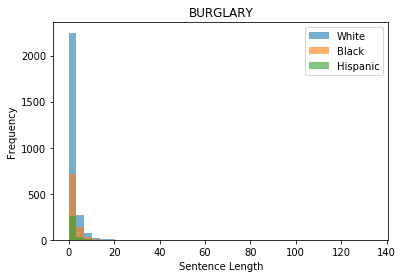

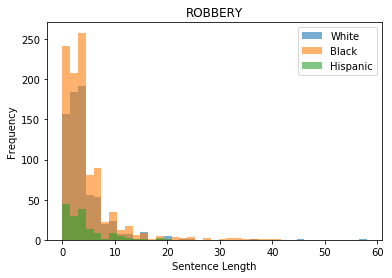

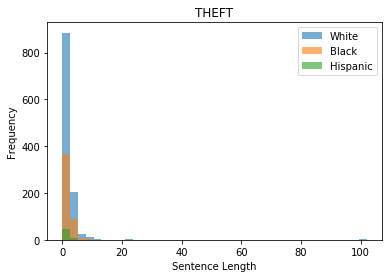

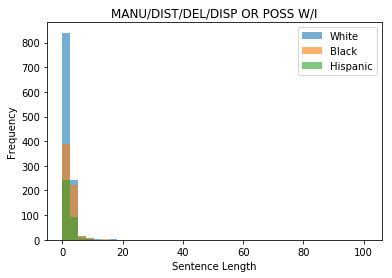

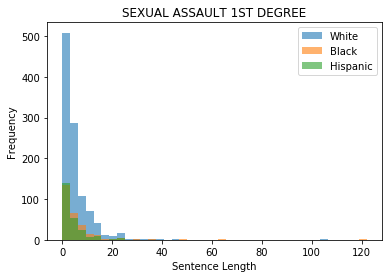

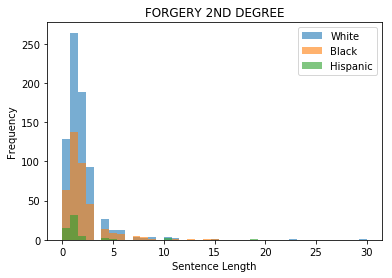

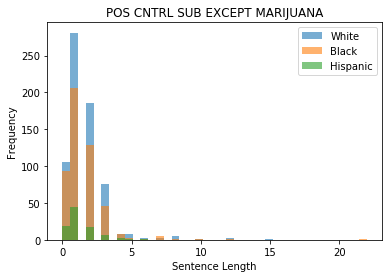

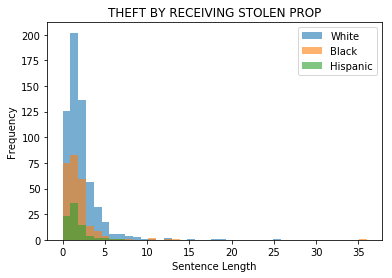

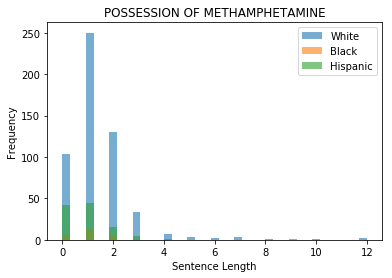

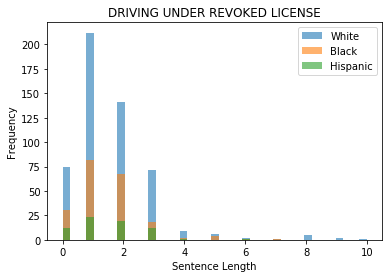

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
for crime in top_crimes:
    white_list = sentence_dict[crime + " - WHITE"]
    for i in range(len(white_list)):
        if white_list[i] == "LFE" or white_list[i] == "DTH":
            white_list[i] = 122
        white_list[i] = int(white_list[i])
        if white_list[i] < 0:
            white_list[i] = 0
    black_list = sentence_dict[crime + " - BLACK"]
    for i in range(len(black_list)):
        if black_list[i] == "LFE" or black_list[i] == "DTH":
            black_list[i] = 122
        black_list[i] = int(black_list[i])
        if black_list[i] < 0:
            black_list[i] = 0
    hisp_list = sentence_dict[crime + " - HISPANIC"]
    for i in range(len(hisp_list)):
        if hisp_list[i] == "LFE" or hisp_list[i] == "DTH":
            hisp_list[i] = 122
        hisp_list[i] = int(hisp_list[i])
        if hisp_list[i] < 0:
            hisp_list[i] = 0
    
    
    bins = np.linspace(0, max(max(white_list), max(black_list)), 40)
    plt.hist(white_list, bins, alpha=0.6, label='White')
    plt.hist(black_list, bins, alpha=0.6, label='Black')
    plt.hist(hisp_list, bins, alpha=0.6, label='Hispanic')
    plt.legend(loc='upper right')
    plt.title(crime)
    plt.xlabel("Sentence Length")
    plt.ylabel("Frequency")
    
    
    plt.show()
    